# Ensemble methods

### Read the input files

In [2]:
import numpy as np
import os

XTrain = []
YTrain = []
XTest = []
YTest = []
# trainPath = r'/UCI HAR Dataset/UCI HAR Dataset/train/'
# testPath = r'/UCI HAR Dataset/UCI HAR Dataset/test/'
trainPath = r'/Dataset/UCI HAR Dataset/UCI HAR Dataset/train/'
testPath = r'/Dataset/UCI HAR Dataset/UCI HAR Dataset/test/'

#XTrain = np.loadtxt(os.getcwd() + r'/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', delimiter=" ", dtype='str')
xTrainFileName = os.getcwd() + trainPath + r'X_train.txt'
with open(xTrainFileName, "r") as myfile:
    for line in myfile:
        XTrain.append(map(float, line.split()))
        
              
yTrainFileName = os.getcwd() + trainPath + r'y_train.txt'
with open(yTrainFileName, "r") as myfile:
    for line in myfile:
        YTrain.append(int(line.strip()))

XTrain = np.asarray(XTrain)
YTrain = np.asarray(YTrain)

xTestFileName = os.getcwd() + testPath + r'X_test.txt'
with open(xTestFileName, "r") as myfile:
    for line in myfile:
        XTest.append(map(float, line.split()))
        
              
yTestFileName = os.getcwd() + testPath + r'y_test.txt'
with open(yTestFileName, "r") as myfile:
    for line in myfile:
        YTest.append(int(line.strip()))
        
        
XTest = np.asarray(XTest)
YTest = np.asarray(YTest)

### Preprocess the time series data using Fast Fourier Transform

In [3]:
from scipy.fftpack import fft
# The first 265 columns represent the acceleration for all the axes in the Time Series Domain
xfTrain = fft(XTrain[:,0:265])
xfTest = fft(XTest[:,0:265])

# timeSeriesFFT = []
# for row in xf:
#     timeSeriesFFT.append(row)

# print (np.array(timeSeriesFFT)).shape

### Concatenate the acceleration for all the axes into one feature vector.

In [4]:
XTrain = np.append(XTrain[:,265:], xfTrain , 1)
XTest = np.append(XTest[:,265:], xfTest , 1)

### Try out different classifiers

In [5]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
def classifyRandomForestClassifier(XTrain, XTest, YTrain, YTest):
    clf = RandomForestClassifier(n_estimators=10)
    clf.fit(XTrain, YTrain)
    YPred = clf.predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size), YPred

In [6]:
#K Nearest Neighbours Classifier
from sklearn.neighbors import KNeighborsClassifier
def classifyKNNClassifier(XTrain, XTest, YTrain, YTest):
    neigh = KNeighborsClassifier(n_neighbors=3)
    YPred = neigh.fit(XTrain, YTrain).predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size), YPred

In [7]:
# Linear Regression
from sklearn import linear_model
def classifyLinearRegressionClassifier(XTrain, XTest, YTrain, YTest):
    LR = linear_model.LinearRegression()
    YPred = LR.fit(XTrain, YTrain).predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size), YPred

In [8]:
# Bayesian Ridge
from sklearn import linear_model
def classifyBayesianRidgeClassifier(XTrain, XTest, YTrain, YTest):
    clflml = linear_model.BayesianRidge()
    YPred = clflml.fit(XTrain, YTrain).predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size), YPred

In [9]:
# ARD Regression
from sklearn import linear_model
def classifyARDRegressionClassifier(XTrain, XTest, YTrain, YTest):
    clflml = linear_model.ARDRegression(compute_score=True)
    YPred = clflml.fit(XTrain, YTrain).predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size), YPred

In [10]:
# Logistic Regression
from sklearn import linear_model
def classifyLogisticRegressionClassifier(XTrain, XTest, YTrain, YTest):
    LogReg = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None)
    YPred = LogReg.fit(XTrain, YTrain).predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size), YPred

In [11]:
#Decision Tree
from sklearn import tree
def classifyDecisionTreeClassifier(XTrain, XTest, YTrain, YTest):
    clf = tree.DecisionTreeClassifier()
    YPred = clf.fit(XTrain, YTrain).predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size), YPred

In [12]:
#Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
def classifyGaussianNaiveBayesClassifier(XTrain, XTest, YTrain, YTest):
    gnb = GaussianNB()
    YPred = gnb.fit(XTrain, YTrain).predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size), YPred

In [13]:
#Bernoulli Naive Bayes Classifier
from sklearn.naive_bayes import BernoulliNB
def classifyBernoulliNaiveBayesClassifier(XTrain, XTest, YTrain, YTest):
    bnb = BernoulliNB()
    YPred = bnb.fit(XTrain, YTrain).predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size), YPred

In [14]:
#Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
def classifyMultinomialNaiveBayesClassifier(XTrain, XTest, YTrain, YTest):
    mnb = MultinomialNB()
    YPred = mnb.fit(XTrain, YTrain).predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size), YPred

In [15]:
#One Vs Rest SVM Classifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
def classifyOneVsRestClassifier(XTrain, XTest, YTrain, YTest):
    YPred = OneVsRestClassifier(LinearSVC(random_state=0)).fit(XTrain, YTrain).predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size), YPred

In [16]:
#One Vs One SVM Classifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
def classifyOneVsOneClassifier(XTrain, XTest, YTrain, YTest):
    YPred = OneVsOneClassifier(LinearSVC(random_state=0)).fit(XTrain, YTrain).predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size), YPred

In [17]:
#Output Code SVM Classifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.svm import LinearSVC
def classifyOutputCodeClassifier(XTrain, XTest, YTrain, YTest):
    clf = OutputCodeClassifier(LinearSVC(random_state=0),code_size=2, random_state=0)
    YPred = clf.fit(XTrain, YTrain).predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size), YPred

In [18]:
#Multi Class SVM
from sklearn import svm
from sklearn.svm import NuSVC
def classifyMultiClassSVMClassifier(XTrain, XTest, YTrain, YTest):
    YPred = svm.SVC(kernel='linear').fit(XTrain, YTrain).predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size), YPred

### Classify the signals into different activities. <br> </br> Use Leave-One-Out crossvalidation, where you test on one user and train on the rest of them.

In [19]:
# from sklearn import cross_validation
# # X = xf
# y = YTrain
# N = 7352
# loo = cross_validation.LeaveOneOut(N)
# print loo

# totalScore = 0.0
# for train_index, test_index in loo:
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     score, YPred = classifyGaussianNaiveBayesClassifier(X_train, X_test, y_train, y_test)
#     totalScore += score
# totalScore = totalScore/N
# print totalScore

In [20]:
#Stratified K Fold Cross Validation
from sklearn.cross_validation import StratifiedKFold
def stratifiedKFoldVal(XTrain, YTrain, classify):
    n_folds = 10
    totalScore = 0.0
    skf = StratifiedKFold(YTrain, n_folds)
    for train_index, test_index in skf:
        X_train, X_test = XTrain[train_index], XTrain[test_index]
        y_train, y_test = YTrain[train_index], YTrain[test_index]
        score, YPred = classify(X_train, X_test,  y_train, y_test)
        totalScore += score
    return totalScore/n_folds

In [21]:
classify = classifyRandomForestClassifier
score = stratifiedKFoldVal(XTrain, YTrain, classify)
print score

89.8574050244


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:373: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


In [22]:
classify = classifyKNNClassifier
score = stratifiedKFoldVal(XTrain, YTrain, classify)
print score

86.9656713006


/usr/lib/python2.7/dist-packages/numpy/core/numeric.py:460: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [23]:
# classify = classifyLinearRegressionClassifier
# score = stratifiedKFoldVal(XTrain, YTrain, classify)
# print score

In [24]:
# classify = classifyBayesianRidgeClassifier
# score = stratifiedKFoldVal(XTrain, YTrain, classify)
# print score

In [25]:
# classify = classifyARDRegressionClassifier
# score = stratifiedKFoldVal(XTrain, YTrain, classify)
# print score

In [26]:
# classify = classifyLogisticRegressionClassifier
# score = stratifiedKFoldVal(XTrain, YTrain, classify)
# print score

In [27]:
classify = classifyDecisionTreeClassifier
score = stratifiedKFoldVal(XTrain, YTrain, classify)
print score

85.9186961915


In [28]:
classify = classifyGaussianNaiveBayesClassifier
score = stratifiedKFoldVal(XTrain, YTrain, classify)
print score

53.9947542962


/usr/local/lib/python2.7/dist-packages/sklearn/naive_bayes.py:378: ComplexWarning: Casting complex values to real discards the imaginary part
  self.theta_[i, :] = new_theta


In [29]:
# classify = classifyMultinomialNaiveBayesClassifier
# score = stratifiedKFoldVal(XTrain, YTrain, classify)
# print score

In [30]:
classify = classifyBernoulliNaiveBayesClassifier
score = stratifiedKFoldVal(XTrain, YTrain, classify)
print score

/usr/local/lib/python2.7/dist-packages/sklearn/naive_bayes.py:758: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  self.feature_count_ += safe_sparse_dot(Y.T, X)
/usr/local/lib/python2.7/dist-packages/sklearn/naive_bayes.py:758: ComplexWarning: Casting complex values to real discards the imaginary part
  self.feature_count_ += safe_sparse_dot(Y.T, X)
/usr/local/lib/python2.7/dist-packages/sklearn/naive_bayes.py:758: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  self.feature_count_ += safe_sparse_dot(Y.T, X)
/usr/local/lib/python2.7/dist-packages/sklearn/naive_bayes.py:758: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  self.feature_

84.1802261018


In [31]:
# classify = classifyOneVsRestClassifier
# score = stratifiedKFoldVal(XTrain, YTrain, classify)
# print score

In [55]:
# classify = classifyOneVsOneClassifier
# score = stratifiedKFoldVal(XTrain, YTrain, classify)
# print score

In [33]:
classify = classifyOutputCodeClassifier
score = stratifiedKFoldVal(XTrain, YTrain, classify)
print score

94.8525338659


In [34]:
classify = classifyMultiClassSVMClassifier
score = stratifiedKFoldVal(XTrain, YTrain, classify)
print score

93.6985423391


### Implement a Python framework for mixture of experts, 
### where the user can assign multiple classifiers to a different region of the feature space.

In [35]:
from sklearn.cross_validation import train_test_split
np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(XTrain, YTrain, test_size=0.7)

In [36]:
def EnsembleFeatureSplitClassifiers(X_train, X_test, y_train, y_test, splitFeatIdx, classifiersList = [classifyKNNClassifier, classifyGaussianNaiveBayesClassifier, classifyOutputCodeClassifier, classifyMultiClassSVMClassifier]):
    assert(len(classifiersList)*2 == len(splitFeatIdx))
    
#     s1,YPred1 = classifyRandomForestClassifier(X_train[:,splitFeatIdx[0]:splitFeatIdx[1]], X_test[:,splitFeatIdx[0]:splitFeatIdx[1]], y_train, y_test)
#     s2,YPred2 = classifyKNNClassifier(X_train[:,splitFeatIdx[2]:splitFeatIdx[3]], X_test[:,splitFeatIdx[2]:splitFeatIdx[3]], y_train, y_test)
#     s3,YPred3 = classifyGaussianNaiveBayesClassifier(X_train[:,splitFeatIdx[4]:splitFeatIdx[5]], X_test[:,splitFeatIdx[4]:splitFeatIdx[5]], y_train, y_test)
#     s4,YPred4 = classifyMultiClassSVMClassifier(X_train[:,splitFeatIdx[6]:splitFeatIdx[7]], X_test[:,splitFeatIdx[6]:splitFeatIdx[7]], y_train, y_test)
#     # Combine Y Predicted values from different classifiers
#     XCombinedOp = np.column_stack((YPred1, YPred2, YPred3, YPred4))

    YPred = []
    i = 0
    for classifier in classifiersList:
        s,ypred = classifier(X_train[:,splitFeatIdx[i]:splitFeatIdx[i+1]], X_test[:,splitFeatIdx[i]:splitFeatIdx[i+1]], y_train, y_test)
        i = i + 2
        # Combine Y Predicted values from different classifiers
        YPred.append(ypred)
    
    XCombinedOp = np.column_stack(YPred)
    
    return XCombinedOp

### The results of these classifiers are forwarded to an additional classifier 
### (e.g. neural network) that is trained to optimally combine the output from the first stage.

In [39]:
try:
    from sknn.mlp import Classifier, Layer
except ImportError:
    print 'Please install scikit-neuralnetwork(pip install scikit-neuralnetwork)'

def NeuralNetworkCombiner(XCombinedOpTrain, y_train, XCombinedOpTest, YTest):
    nn = Classifier(layers=[Layer("Rectifier", units=100),Layer("Linear")],
        learning_rate=0.02,
        n_iter=10)
    nn.fit(XCombinedOpTrain, y_train)
    YTestPred = nn.predict(XCombinedOpTest)
    diff = YTestPred - YTest.reshape(YTestPred.shape)
    score = diff[diff == 0].size
    score = (100.0 * score)/(YTestPred.size)
    return score

In [40]:
scoreDisjointFeatures = []
scoreOverlappingFeatures = []
scoreAllFeatures = []

### Using disjoint features for all classifiers

In [41]:
# With only 1 classifier
classifiersList = [classifyKNNClassifier]
featSplit = [0,561]

XCombinedOpTrain = EnsembleFeatureSplitClassifiers(X_train, X_test, y_train, y_test, featSplit, classifiersList)
XCombinedOpTest = EnsembleFeatureSplitClassifiers(X_train, XTest, y_train, YTest, featSplit, classifiersList)
score1 = NeuralNetworkCombiner(XCombinedOpTrain, y_test, XCombinedOpTest, YTest)
print score1
scoreDisjointFeatures.append(score1)

56.5320665083


/usr/local/lib/python2.7/dist-packages/sknn/backend/pylearn2/__init__.py:13: UserWarning: 

The PyLearn2 backend is deprecated; the next release will switch to Lasagne by default.

Test the change using the following at the top of your script:
> from sknn.backend import lasagne

  """ + ansi.ENDC, category=UserWarning)


In [42]:
# With 2 classifiers
featSplit = [0,230,230,561]
classifiersList = [classifyKNNClassifier, classifyGaussianNaiveBayesClassifier]
#classifiersList = [classifyGaussianNaiveBayesClassifier, classifyKNNClassifier]

XCombinedOpTrain = EnsembleFeatureSplitClassifiers(X_train, X_test, y_train, y_test, featSplit, classifiersList)
XCombinedOpTest = EnsembleFeatureSplitClassifiers(X_train, XTest, y_train, YTest, featSplit, classifiersList)
score2 = NeuralNetworkCombiner(XCombinedOpTrain, y_test, XCombinedOpTest, YTest)
print score2
scoreDisjointFeatures.append(score2)

48.5578554462


In [43]:
# With 3 classifiers
classifiersList = [classifyKNNClassifier, classifyGaussianNaiveBayesClassifier, classifyOutputCodeClassifier]
featSplit = [0,185,185,370,370,561]

XCombinedOpTrain = EnsembleFeatureSplitClassifiers(X_train, X_test, y_train, y_test, featSplit, classifiersList)
XCombinedOpTest = EnsembleFeatureSplitClassifiers(X_train, XTest, y_train, YTest, featSplit, classifiersList)
score3 = NeuralNetworkCombiner(XCombinedOpTrain, y_test, XCombinedOpTest, YTest)
print score3
scoreDisjointFeatures.append(score3)

74.0074652189


In [44]:
# With 4 classifiers
classifiersList = [classifyKNNClassifier, classifyGaussianNaiveBayesClassifier, classifyOutputCodeClassifier, classifyMultiClassSVMClassifier]
featSplit = [0,140,140,280,280,420,420,561]

XCombinedOpTrain = EnsembleFeatureSplitClassifiers(X_train, X_test, y_train, y_test, featSplit)
XCombinedOpTest = EnsembleFeatureSplitClassifiers(X_train, XTest, y_train, YTest, featSplit)
score4 = NeuralNetworkCombiner(XCombinedOpTrain, y_test, XCombinedOpTest, YTest)
print score4
scoreDisjointFeatures.append(score4)

85.44282321


### Does the accuracy change if you use overlapping regions instead of disjunct ones?

In [45]:
# With 1 classifier
classifiersList = [classifyKNNClassifier]
featSplit = [0,561]

XCombinedOpTrain = EnsembleFeatureSplitClassifiers(X_train, X_test, y_train, y_test, featSplit, classifiersList)
XCombinedOpTest = EnsembleFeatureSplitClassifiers(X_train, XTest, y_train, YTest, featSplit, classifiersList)
score1 = NeuralNetworkCombiner(XCombinedOpTrain, y_test, XCombinedOpTest, YTest)
print score1
scoreOverlappingFeatures.append(score1)

56.5320665083


In [46]:
# With 2 classifiers
featSplit = [0,290,220,561]
classifiersList = [classifyKNNClassifier, classifyGaussianNaiveBayesClassifier]

XCombinedOpTrain = EnsembleFeatureSplitClassifiers(X_train, X_test, y_train, y_test, featSplit, classifiersList)
XCombinedOpTest = EnsembleFeatureSplitClassifiers(X_train, XTest, y_train, YTest, featSplit, classifiersList)
score2 = NeuralNetworkCombiner(XCombinedOpTrain, y_test, XCombinedOpTest, YTest)
print score2
scoreOverlappingFeatures.append(score2)

57.9233118426


In [47]:
# With 3 classifiers
classifiersList = [classifyKNNClassifier, classifyGaussianNaiveBayesClassifier, classifyOutputCodeClassifier]
featSplit = [0,280,120,340,260,561]

XCombinedOpTrain = EnsembleFeatureSplitClassifiers(X_train, X_test, y_train, y_test, featSplit, classifiersList)
XCombinedOpTest = EnsembleFeatureSplitClassifiers(X_train, XTest, y_train, YTest, featSplit, classifiersList)
score3 = NeuralNetworkCombiner(XCombinedOpTrain, y_test, XCombinedOpTest, YTest)
print score3
scoreOverlappingFeatures.append(score3)

76.6542246352


In [48]:
# Using overlapping features for all classifiers
featSplit = [0,280,120,320,180,360,240,561]
XCombinedOpTrain = EnsembleFeatureSplitClassifiers(X_train, X_test, y_train, y_test, featSplit)
XCombinedOpTest = EnsembleFeatureSplitClassifiers(X_train, XTest, y_train, YTest, featSplit)
score4 = NeuralNetworkCombiner(XCombinedOpTrain, y_test, XCombinedOpTest, YTest)
print score4
scoreOverlappingFeatures.append(score4)

76.4845605701


### With All features being used in all of the Classifiers.

In [49]:
# With 1 classifier
classifiersList = [classifyKNNClassifier]
featSplit = [0,561]

XCombinedOpTrain = EnsembleFeatureSplitClassifiers(X_train, X_test, y_train, y_test, featSplit, classifiersList)
XCombinedOpTest = EnsembleFeatureSplitClassifiers(X_train, XTest, y_train, YTest, featSplit, classifiersList)
score1 = NeuralNetworkCombiner(XCombinedOpTrain, y_test, XCombinedOpTest, YTest)
print score1
scoreAllFeatures.append(score1)

56.5320665083


In [50]:
# With 2 classifiers
featSplit = [0,561,0,561]
classifiersList = [classifyKNNClassifier, classifyGaussianNaiveBayesClassifier]

XCombinedOpTrain = EnsembleFeatureSplitClassifiers(X_train, X_test, y_train, y_test, featSplit, classifiersList)
XCombinedOpTest = EnsembleFeatureSplitClassifiers(X_train, XTest, y_train, YTest, featSplit, classifiersList)
score2 = NeuralNetworkCombiner(XCombinedOpTrain, y_test, XCombinedOpTest, YTest)
print score2
scoreAllFeatures.append(score2)

77.502544961


In [51]:
# With 3 classifiers
classifiersList = [classifyKNNClassifier, classifyGaussianNaiveBayesClassifier, classifyOutputCodeClassifier]
featSplit = [0,561,0,561,0,561]

XCombinedOpTrain = EnsembleFeatureSplitClassifiers(X_train, X_test, y_train, y_test, featSplit, classifiersList)
XCombinedOpTest = EnsembleFeatureSplitClassifiers(X_train, XTest, y_train, YTest, featSplit, classifiersList)
score3 = NeuralNetworkCombiner(XCombinedOpTrain, y_test, XCombinedOpTest, YTest)
print score3
scoreAllFeatures.append(score3)

87.4787919919


In [52]:
# Using all features for all classifiers
featSplit = [0,561,0,561,0,561,0,561]
XCombinedOpTrain = EnsembleFeatureSplitClassifiers(X_train, X_test, y_train, y_test, featSplit)
XCombinedOpTest = EnsembleFeatureSplitClassifiers(X_train, XTest, y_train, YTest, featSplit)
score1 = NeuralNetworkCombiner(XCombinedOpTrain, y_test, XCombinedOpTest, YTest)
print score1
scoreAllFeatures.append(score1)

65.6599932134


In [53]:
# import numpy as np
# from sklearn.neural_network import BernoulliRBM
# model = BernoulliRBM(n_components=2, n_iter=50)
# model.fit(XCombinedOpTrain, y_test)
# print model.intercept_hidden_
# print model.intercept_visible_
# print model.components_

### Graph of change of accuracy w.r.t. the number of used classifiers in the first stage.

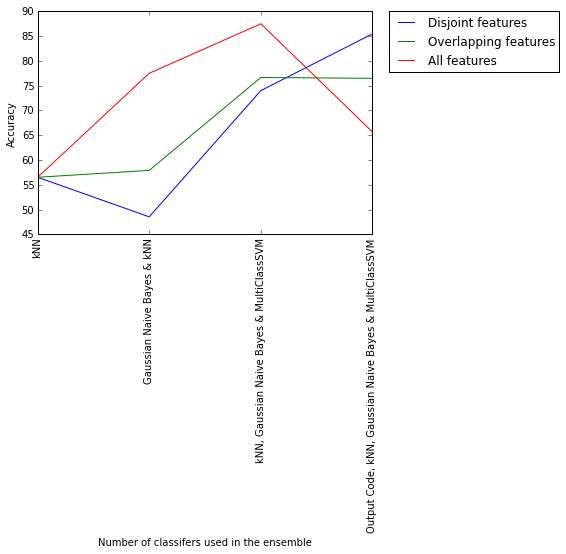

In [54]:
#Plotting the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(scoreDisjointFeatures, label = "Disjoint features")
plt.plot(scoreOverlappingFeatures, label = "Overlapping features")
plt.plot(scoreAllFeatures, label = "All features")

labels = ['kNN', 'Gaussian Naive Bayes & kNN', 'kNN, Gaussian Naive Bayes & MultiClassSVM', 'Output Code, kNN, Gaussian Naive Bayes & MultiClassSVM' ]
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(np.arange(len(labels)), labels, rotation='vertical')

plt.ylabel('Accuracy')
plt.xlabel('Number of classifers used in the ensemble')
# Place a legend to the right of this smaller figure.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Is there any benefit of using mixture of experts on this dataset?

1. Disjoint features gives comparatively poor results than overlapping features, but it again depends on what features are passed to each of these classifiers. There is variance in the results if we change the disjoint features being passed to each classifier or if we increase the number of classifiers.

2. Overlapping features gives better results but depends on the number of classifiers and the features which were passed to it. Moreover, using Overlapping features over more number of classifiers gives consistent results.

3. As shown in the above graph, if we pass all the features to each of the classifiers it gives better results and then the results drop as we increase the number of classifiers.

Note: All these results depend on the type of classifiers used in the ensemble and the features passed to it!